<h1>第10章: ベクトル空間法 (II)</h1>

第10章では，前章に引き続き単語ベクトルの学習に取り組む．

<h2>目次</h2>

- [90. word2vecによる学習](#prob90)
>[86. 単語ベクトルの表示](#prob90_86)  
>[87. 単語の類似度](#prob90_87)  
>[88. 類似度の高い単語10件](#prob90_88)  
>[89. 加法構成性によるアナロジー](#prob90_89)


- [91. アナロジーデータの準備](#prob91)
- [92. アナロジーデータへの適用](#prob92)
- [93. アナロジータスクの正解率の計算](#prob93)
- [94. WordSimilarity-353での類似度計算](#prob94)
- [95. WordSimilarity-353での評価](#prob95)
- [96. 国名に関するベクトルの抽出](#prob96)
- [97. k-meansクラスタリング](#prob97)
- [98. Ward法によるクラスタリング](#prob98)
- [99. t-SNEによる可視化](#prob99)

In [1]:
!mkdir data

In [2]:
!mkdir work

<a name='prob90'></a>
# 90. word2vecによる学習

81で作成したコーパスに対してword2vecを適用し，単語ベクトルを学習せよ．<br>
さらに，学習した単語ベクトルの形式を変換し，86-89のプログラムを動かせ．

81のコーパスをcopy

In [2]:
cp ../chapter09/work/text_tokenized_comp.txt ./work/

In [7]:
from gensim.models import word2vec

In [2]:
word2vec.Word2Vec?

Init signature: word2vec.Word2Vec(sentences=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)
Docstring:     
Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.

Once you're finished training a model (=no more updates, only querying)
store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in `self.wv` to reduce memory.

The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
:meth:`~gensim.models.word2vec.Word2Vec.load` methods.

The trained word vectors can also be stored/loaded from a format compatible with the
original word2vec implementation via `self.wv.save_word2vec_format`
and :meth:`gensim.models

調べるとなぜかword2vec.Text8Corpus使ってるのがいっぱい出てくる...Text8Corpus使ってないのに?

In [3]:
sentences = word2vec.LineSentence('./work/text_tokenized_comp.txt')
model = word2vec.Word2Vec(sentences, size=300)
model.save('./work/w2v.model')

モデルの読み込み

In [8]:
model = word2vec.Word2Vec.load('./work/w2v.model')

<a name='prob90_86'></a>
<h4>86. 単語ベクトルの表示</h4>

"United States"のベクトルを表示せよ．

In [15]:
import numpy as np

In [20]:
vec_united_states = np.array(model.wv.get_vector('United_States')).astype(np.float32)
print(vec_united_states)

[-1.8322263e+00 -6.2546134e-01 -7.2043049e-01  1.8149291e-01
 -5.5494195e-01  5.6448263e-01  5.1221424e-01 -1.4204004e+00
 -1.4121735e+00 -5.1729250e-01  5.2947026e-01 -4.0962359e-01
 -9.2965901e-01  4.4350639e-01 -1.7803624e-01 -1.8722533e+00
 -1.1060681e-01  1.4662588e+00  3.8198864e-01 -1.9606979e-01
  7.8183049e-01 -8.9198656e-02 -3.8411716e-01  3.1929445e-02
 -7.1232313e-01 -1.0878688e+00  3.1231347e-01 -1.3940368e+00
 -7.8417605e-01 -6.6587758e-01  2.2136711e-01  1.1721050e+00
  4.5810637e-01 -3.2026044e-01 -6.6995239e-01 -1.3437524e-01
 -4.8040456e-01  5.2717346e-01  6.0938543e-01 -4.4334787e-01
  4.9657434e-01 -1.9651335e-01  1.1529765e+00 -6.6009849e-01
  2.8933471e-01  1.8502884e-01  3.6458835e-01 -1.3867328e+00
 -6.5697871e-02 -6.9966018e-01 -3.0219144e-01 -3.5580540e-01
  2.5927311e-01  1.3343592e+00 -1.0347542e-01 -4.0563101e-01
  6.4555275e-01 -8.2685924e-01  4.5221245e-01  1.3454664e+00
  5.8885473e-01  4.5343029e-01 -9.7578198e-01 -5.8697230e-01
  1.4762414e+00 -6.33042

<a name='prob90_87'></a>
<h4>87. 単語の類似度</h4>

"United States"と"U.S."のコサイン類似度を計算せよ．

In [39]:
vec_us = np.array([model.wv.get_vector('U.S')]).astype(np.float32)

In [32]:
model.wv.cosine_similarities?

Signature: model.wv.cosine_similarities(vector_1, vectors_all)
Docstring:
Compute cosine similarities between one vector and a set of other vectors.

Parameters
----------
vector_1 : numpy.ndarray
    Vector from which similarities are to be computed, expected shape (dim,).
vectors_all : numpy.ndarray
    For each row in vectors_all, distance from vector_1 is computed, expected shape (num_vectors, dim).

Returns
-------
numpy.ndarray
    Contains cosine distance between `vector_1` and each row in `vectors_all`, shape (num_vectors,).
File:      ~/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/gensim/models/keyedvectors.py
Type:      function


In [51]:
cos_sim = model.wv.cosine_similarities(vec_united_states, vec_us)
print(cos_sim[0])

0.8567372


<a name='prob90_88'></a>
<h4>88. 類似度の高い単語10件</h4>

"England"とコサイン類似度が高い10語と，その類似度を出力せよ．

なんかこれで動くっぽいけどよくわからん

In [73]:
from gensim.similarities.index import AnnoyIndexer
indexer = AnnoyIndexer(model, 2)
for word, similarity in model.most_similar('England', topn=11, indexer=indexer)[1:]:
    print(word, similarity)

Scotland 0.6604172885417938
Britain 0.5482268333435059
Sweden 0.5474177896976471
Germany 0.5465056598186493
Spain 0.5407399833202362
Italy 0.5251369476318359
Denmark 0.5132494270801544
Norway 0.5066690444946289
Hungary 0.5014909505844116
France 0.5009268522262573


/Users/r-fujii/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/r-fujii/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


<a name='prob90_89'></a>
<h4>89. 加法構成性によるアナロジー</h4>

vec("Spain") - vec("Madrid") + vec("Athens")を計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [58]:
model.wv.most_similar?

Signature: model.wv.most_similar(positive=None, negative=None, topn=10, restrict_vocab=None, indexer=None)
Docstring:
Find the top-N most similar words.
Positive words contribute positively towards the similarity, negative words negatively.

This method computes cosine similarity between a simple mean of the projection
weight vectors of the given words and the vectors for each word in the model.
The method corresponds to the `word-analogy` and `distance` scripts in the original
word2vec implementation.

Parameters
----------
positive : list of str, optional
    List of words that contribute positively.
negative : list of str, optional
    List of words that contribute negatively.
topn : int, optional
    Number of top-N similar words to return.
restrict_vocab : int, optional
    Optional integer which limits the range of vectors which
    are searched for most-similar values. For example, restrict_vocab=10000 would
    only check the first 10000 word vectors in the vocabulary order. (T

In [59]:
sim_words = model.wv.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

/Users/r-fujii/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [60]:
for word, similarity in sim_words:
    print(word, similarity)

Denmark 0.7489697933197021
Greece 0.7338849306106567
Austria 0.7327172756195068
Egypt 0.7324112057685852
Italy 0.724071204662323
Norway 0.7027219533920288
Sweden 0.7011550664901733
Portugal 0.6942399144172668
Russia 0.6937078833580017
Netherlands 0.6917681694030762


<a name='prob91'></a>
# 91. アナロジーデータの準備

単語アナロジーの評価データをダウンロードせよ．<br>
このデータ中で": "で始まる行はセクション名を表す．<br>
例えば，": capital-common-countries"という行は，"capital-common-countries"というセクションの開始を表している．<br>
ダウンロードした評価データの中で，"family"というセクションに含まれる評価事例を抜き出してファイルに保存せよ．

**100本ノックページのリンク切れがひどい**

In [75]:
!wget -NP ./data/ https://github.com/svn2github/word2vec/raw/master/questions-words.txt

--2018-08-23 21:46:55--  https://github.com/svn2github/word2vec/raw/master/questions-words.txt
github.com (github.com) をDNSに問いあわせています... 192.30.255.113, 192.30.255.112
github.com (github.com)|192.30.255.113|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 302 Found
場所: https://raw.githubusercontent.com/svn2github/word2vec/master/questions-words.txt [続く]
--2018-08-23 21:46:56--  https://raw.githubusercontent.com/svn2github/word2vec/master/questions-words.txt
raw.githubusercontent.com (raw.githubusercontent.com) をDNSに問いあわせています... 151.101.72.133
raw.githubusercontent.com (raw.githubusercontent.com)|151.101.72.133|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 603955 (590K) [text/plain]
`./data/questions-words.txt' に保存中

questions-words.txt 100%[===================>] 589.80K  2.42MB/s 時間 0.2s     

Last-modified ヘッダがありません -- 日付を無効にします。
2018-08-23 21:46:57 (2.42 MB/s) - `./data/questions-words.txt' へ保存完了 [603955/603955]



In [1]:
cat ./data/questions-words.txt 2>/dev/null | head

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [1]:
from itertools import groupby
from more_itertools import with_iter

In [44]:
sections = groupby(with_iter(open('./data/questions-words.txt')), lambda line: line.startswith(': '))

In [45]:
flag_family = False

with open('./work/family.txt', 'w') as f:
    for is_caption, val in sections:
        if is_caption:
            sect_name = [v.rstrip() for v in val][0]
            if sect_name.replace(': ', '') == 'family':
                flag_family = True
        elif flag_family:
            for ex_eval in (v for v in val):
                print(ex_eval.rstrip(), file=f)
            break

In [1]:
!head work/family.txt

boy girl brother sister
boy girl brothers sisters
boy girl dad mom
boy girl father mother
boy girl grandfather grandmother
boy girl grandpa grandma
boy girl grandson granddaughter
boy girl groom bride
boy girl he she
boy girl his her


more_itertools.chunkedで1セクションを1かたまりにするのを試みたがうまくいかなかった... なぜかsect_nameが空リストになる

<a name='prob92'></a>
# 92. アナロジーデータへの適用

91で作成した評価データの各事例に対して，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．<br>
求めた単語と類似度は，各事例の末尾に追記せよ．<br>
このプログラムを85で作成した単語ベクトル，90で作成した単語ベクトルに対して適用せよ．

<h4>90で作成した単語ベクトル</h4>

In [25]:
model = word2vec.Word2Vec.load('./work/w2v.model')

In [49]:
with open('./work/family.txt') as f, open('./work/family_analogy90.txt', 'w') as out:
    for line in f:
        words = line.split()
        is_invocab = all([(word in model.wv.vocab) for word in words])
        if is_invocab:
            for sim_word, score in model.wv.most_similar(positive=[words[1], words[2]], negative=[words[0]], topn=1):
                print(line.rstrip(), sim_word, score, file=out)

/Users/r-fujii/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [2]:
!head work/family_analogy90.txt

boy girl brother sister uncle 0.7504428029060364
boy girl brothers sisters sisters 0.8431822061538696
boy girl dad mom mom 0.7923681735992432
boy girl father mother mother 0.8484042882919312
boy girl grandfather grandmother uncle 0.82994544506073
boy girl grandson granddaughter granddaughter 0.8469682335853577
boy girl groom bride bride 0.6955556869506836
boy girl he she she 0.7772398591041565
boy girl his her her 0.6515668034553528
boy girl husband wife wife 0.7058846354484558


<h4>85で作成した単語ベクトル</h4>

PCAかけた後の行列を保存し忘れた...同じ結果になったからよかったけど

In [1]:
from scipy import io

/Users/r-fujii/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/r-fujii/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
X = io.loadmat('../chapter09/work/matX.mat')['X']

In [4]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=300)
pca.fit(X)

TruncatedSVD(algorithm='randomized', n_components=300, n_iter=5,
       random_state=None, tol=0.0)

In [5]:
X_embedded = pca.transform(X)

In [23]:
import pickle

with open('../chapter09/work/variables.pickle', 'rb') as f:
    dic = pickle.load(f)
    f_t = dic.get('f_t')
    
word2idx_t = {w:i for i, (w, _) in enumerate(f_t.items())}
idx2word_t = {i:w for i, (w, _) in enumerate(f_t.items())}

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

$10^5$サイズの単語ベクトル行列に1行1行アタックしてるからめっちゃ時間かかる (15mぐらい?)

In [25]:
with open('./work/family.txt') as f, open('./work/family_analogy85.txt', 'w') as out:
    for line in f:
        words = line.split()
        is_invocab = all([(word in word2idx_t) for word in words])
        if is_invocab:
            w0_vec = X_embedded[word2idx_t[words[0]]]
            w1_vec = X_embedded[word2idx_t[words[1]]]
            w2_vec = X_embedded[word2idx_t[words[2]]]
            vec_comp = np.array([w1_vec - w0_vec + w2_vec]).astype(np.float32)
            
            cos_sim = cosine_similarity(X_embedded, vec_comp)[:,0]
            index_top_sim = np.argsort(cos_sim, axis=0)[::-1][0]
            score = cos_sim[index_top_sim]
            print(line.rstrip(), idx2word_t[index_top_sim], score, file=out)

In [3]:
!head work/family_analogy85.txt

boy girl brother sister brother 0.9438647591983039
boy girl brothers sisters brothers 0.8802793603617639
boy girl dad mom dad 0.7384941712523243
boy girl father mother father 0.9552980770544842
boy girl grandfather grandmother grandfather 0.8369849883094028
boy girl grandson granddaughter girl 0.6885347123550143
boy girl groom bride girl 0.5147980746959524
boy girl he she he 0.9975983961233814
boy girl his her his 0.9983142815716232
boy girl husband wife husband 0.9327681739639153


<a name='prob93'></a>
# 93. アナロジータスクの正解率の計算

In [26]:
def calc_accuracy(fname):
    with open(fname) as f:
        ct = 0
        for n, line in enumerate(f, start=1):
            words = line.rstrip().split()
            if words[3] == words[4]:
                ct += 1
            
        acc = ct / n
    
    return acc

**2％??**

In [28]:
acc_85 = calc_accuracy('./work/family_analogy85.txt')
print(acc_85)

0.01948051948051948


In [27]:
acc_90 = calc_accuracy('./work/family_analogy90.txt')
print(acc_90)

0.5763157894736842


<a name='prob94'></a>
# 94. WordSimilarity-353での類似度計算

The WordSimilarity-353 Test Collectionの評価データを入力とし，1列目と2列目の単語の類似度を計算し，各行の末尾に類似度の値を追加するプログラムを作成せよ．<br>
このプログラムを85で作成した単語ベクトル，90で作成した単語ベクトルに対して適用せよ．

In [34]:
!wget -NP ./data/ http://www.cs.technion.ac.il/~gabr/resources/data/wordsim353/wordsim353.zip

--2018-08-30 08:41:49--  http://www.cs.technion.ac.il/~gabr/resources/data/wordsim353/wordsim353.zip
www.cs.technion.ac.il (www.cs.technion.ac.il) をDNSに問いあわせています... 132.68.32.15
www.cs.technion.ac.il (www.cs.technion.ac.il)|132.68.32.15|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 304 Not Modified
ファイル `./data/wordsim353.zip' はサーバ側で変更されていませんでした。ダウンロードを省略します。



In [36]:
!unzip -d ./data/wordsim353 ./data/wordsim353.zip

Archive:  ./data/wordsim353.zip
  inflating: ./data/wordsim353/combined.csv  
  inflating: ./data/wordsim353/set1.csv  
  inflating: ./data/wordsim353/set2.csv  
  inflating: ./data/wordsim353/combined.tab  
  inflating: ./data/wordsim353/set1.tab  
  inflating: ./data/wordsim353/set2.tab  
  inflating: ./data/wordsim353/instructions.txt  


<h4>90で作成した単語ベクトル</h4>

In [44]:
with open('./data/wordsim353/combined.tab') as f, open('./work/wordsim90.txt', 'w') as out:
    for i, line in enumerate(f):
        if i == 0: continue
        else:
            col = line.rstrip().split()
            w1 = col[0]
            w2 = col[1]
            if w1 in model.wv.vocab and w2 in model.wv.vocab:
                w1_vec = np.array(model.wv.get_vector(w1)).astype(np.float32)
                w2_vec = np.array([model.wv.get_vector(w2)]).astype(np.float32)
                cos_sim = model.wv.cosine_similarities(w1_vec, w2_vec)
                print(*(col), cos_sim[0], file=out)

In [4]:
!head work/wordsim90.txt

love sex 6.77 0.5274719
tiger cat 7.35 0.7717154
tiger tiger 10.00 1.0
book paper 7.46 0.5486367
computer keyboard 7.62 0.64208794
computer internet 7.58 0.67781603
plane car 5.77 0.60958135
train car 6.31 0.5781715
telephone communication 7.50 0.55711985
television radio 6.77 0.7885381


<h4>85で作成したベクトル</h4>

In [48]:
with open('./data/wordsim353/combined.tab') as f, open('./work/wordsim85.txt', 'w') as out:
    for i, line in enumerate(f):
        if i == 0: continue
        else:
            col = line.rstrip().split()
            w1 = col[0]
            w2 = col[1]
            if w1 in word2idx_t and w2 in word2idx_t:
                w1_vec = np.array([X_embedded[word2idx_t[w1]]]).astype(np.float32)
                w2_vec = np.array([X_embedded[word2idx_t[w2]]]).astype(np.float32)
                cos_sim = cosine_similarity(w1_vec, w2_vec)[:,0]
                print(*(col), cos_sim[0], file=out)

In [5]:
!head work/wordsim85.txt

love sex 6.77 0.5156631
tiger cat 7.35 0.672969
tiger tiger 10.00 1.0000001
book paper 7.46 0.58538353
computer keyboard 7.62 0.31285003
computer internet 7.58 0.43729573
plane car 5.77 0.55006063
train car 6.31 0.6290002
telephone communication 7.50 0.50610894
television radio 6.77 0.76784015


<a name='prob95'></a>
# 95. WordSimilarity-353での評価

94で作ったデータを用い，各モデルが出力する類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

スピアマンの順位相関係数
$$\rho = 1-\frac{6\sum D^2}{N^3-N}$$

<h4>90で作成した単語ベクトル</h4>

In [95]:
sim_score_human = []
sim_score = []

with open('./work/wordsim90.txt') as f:
    for line in f:
        col = line.rstrip().split()
        sim_score_human.append(col[2])
        sim_score.append(col[3])

In [65]:
from scipy.stats import rankdata

def calc_spearman_cor(lis1:list, lis2:list) -> float:
    '''
    2つのリストを受け取ってスピアマンの順位相関係数を返す関数
    '''
    N = len(lis1)
    rank_lis1 = np.array(rankdata(lis1, method='min')).astype(np.int32)
    rank_lis2 = np.array(rankdata(lis2, method='min')).astype(np.int32)
    num = 6 * sum((rank_lis1-rank_lis2)**2)
    deno = N**3 - N
    rho = 1 - num/deno
    
    return rho

In [66]:
calc_spearman_cor(sim_score_human, sim_score)

0.5182554726394268

<h4>85で作成したベクトル</h4>

In [68]:
sim_score_human = []
sim_score = []

with open('./work/wordsim85.txt') as f:
    for line in f:
        col = line.rstrip().split()
        sim_score_human.append(col[2])
        sim_score.append(col[3])

In [69]:
calc_spearman_cor(sim_score_human, sim_score)

0.05559462570794016

<a name='prob96'></a>
# 96. 国名に関するベクトルの抽出

word2vecの学習結果から，国名に関するベクトルのみを抜き出せ．

まず国名のリストを取得(またpandasでwikipediaから拾う)

In [1]:
import pandas as pd

In [2]:
df = pd.io.html.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_and_their_capitals_in_native_languages', skiprows=[0])

In [3]:
import re

In [4]:
regex_link = re.compile('\[[0-9]+\]')
regex_paren = re.compile('\s\(.+\)')

In [5]:
countries = [regex_paren.sub('', regex_link.sub('', df[table_num][0][row])).replace(' ', '_') for table_num in range(25) for row in range(len(df[table_num]))]

In [63]:
df_countries = pd.DataFrame({country: model.wv.get_vector(country) for country in countries\
                             if country in model.wv.vocab}).T

In [64]:
df_countries

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Afghanistan,-0.696880,-0.567271,-0.141895,0.088287,-0.511310,-0.074875,-0.119682,-0.492829,-0.003263,-0.287864,...,0.125635,0.251254,0.411511,-0.542276,0.651576,-0.615721,0.289892,0.336661,0.028522,0.066488
Albania,-0.665367,0.072837,-0.222732,0.128638,-0.465912,-0.159099,0.069425,-0.281446,-0.491425,-0.238622,...,0.466509,0.069304,0.093476,-0.247778,0.017898,-0.246945,-0.242016,0.160766,0.060839,0.017666
Algeria,-0.445337,-0.279541,-0.045822,0.214493,-0.008347,0.104576,0.093107,-0.257138,-0.149092,-0.086135,...,0.196428,-0.246690,0.070935,-0.213249,0.391420,-0.177517,0.142664,-0.076501,0.058899,-0.063840
American_Samoa,-0.317401,-0.403077,-0.043045,0.222416,-0.096532,0.185490,0.185248,-0.105715,-0.116781,-0.035386,...,-0.047090,0.066141,0.118273,-0.168283,0.142286,-0.258891,-0.182048,0.045888,0.293898,-0.075773
Andorra,0.060537,-0.193478,-0.042510,0.034768,0.004757,-0.032897,0.056420,0.075954,0.006874,-0.044248,...,0.014339,-0.119495,0.005104,-0.133206,0.057400,-0.033222,-0.068599,-0.022408,0.059643,-0.045279
Angola,-0.393050,-0.290983,-0.055157,0.065723,-0.535152,0.115544,0.077474,-0.180857,-0.290905,-0.257538,...,0.036779,0.214180,0.198870,-0.281235,0.186684,-0.433460,0.145190,0.117546,0.193407,0.035035
Antigua_and_Barbuda,0.013334,-0.030450,0.008772,0.020063,0.018370,0.011256,0.012836,0.014997,0.009319,-0.005311,...,0.017579,0.001033,0.002911,-0.015730,0.006404,0.012144,-0.021298,-0.008311,0.004840,0.000432
Argentina,-1.237658,-0.201621,-0.514883,0.401429,-0.452805,0.263288,-0.158932,-0.035614,-0.833688,-0.692637,...,0.261844,-0.636702,0.226299,-0.182157,0.625684,-0.484141,0.390835,0.184940,-0.237236,0.198719
Armenia,-0.478429,-0.033255,-0.050951,0.034155,-0.333250,-0.164787,0.456306,0.080298,-0.243009,-0.357659,...,0.696224,0.031833,0.168760,-0.376288,0.316719,-0.501329,-0.014791,0.160107,0.284992,0.002677
Australia,-1.428348,-0.381020,0.564685,1.161905,-0.526797,1.097303,0.221374,-1.223462,-1.445059,-1.503952,...,-0.071893,-0.968339,0.455467,0.670806,1.045337,-1.033724,0.597207,0.767439,0.649009,-0.424582


<a name='prob97'></a>
# 97. k-meansクラスタリング

96の単語ベクトルに対して，k-meansクラスタリングをクラスタ数$k=5$として実行せよ．

In [22]:
import numpy as np

In [20]:
from sklearn.cluster import KMeans

In [69]:
vec_countries = np.array([row for idx, row in df_countries.iterrows()])

In [85]:
vec_countries.shape

(224, 300)

In [72]:
pred = KMeans(n_clusters=5).fit_predict(vec_countries)

In [73]:
pred

array([3, 4, 4, 0, 0, 4, 0, 3, 4, 1, 3, 4, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0,
       4, 0, 0, 3, 0, 0, 3, 0, 0, 4, 0, 1, 0, 0, 0, 0, 4, 1, 0, 0, 4, 0,
       0, 0, 0, 0, 4, 4, 0, 4, 4, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 4, 0,
       0, 4, 3, 3, 0, 0, 0, 4, 3, 4, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 4, 3, 0, 1, 4, 4, 3, 3, 0, 1, 3, 0, 1, 2, 0, 0, 4, 0, 0, 4, 4,
       0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 3, 0, 0, 4, 0, 0, 4, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 3, 0, 1, 0, 0, 4, 0, 0,
       0, 3, 0, 1, 0, 4, 4, 0, 0, 4, 4, 3, 3, 4, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 3, 0, 3, 4, 4, 0, 0, 3, 3, 4, 1,
       0, 4, 4, 0, 0, 0, 0, 0, 3, 0, 0, 4, 4, 0, 1, 1, 4, 0, 0, 0, 4, 3,
       0, 0, 0, 0], dtype=int32)

<a name='prob98'></a>
# 98. Ward法によるクラスタリング

96の単語ベクトルに対して，Ward法による階層型クラスタリングを実行せよ．<br>
さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [75]:
linkage_res = linkage(vec_countries, method='ward')

クラスタリングの閾値を変えるとクラスタの数が変わる

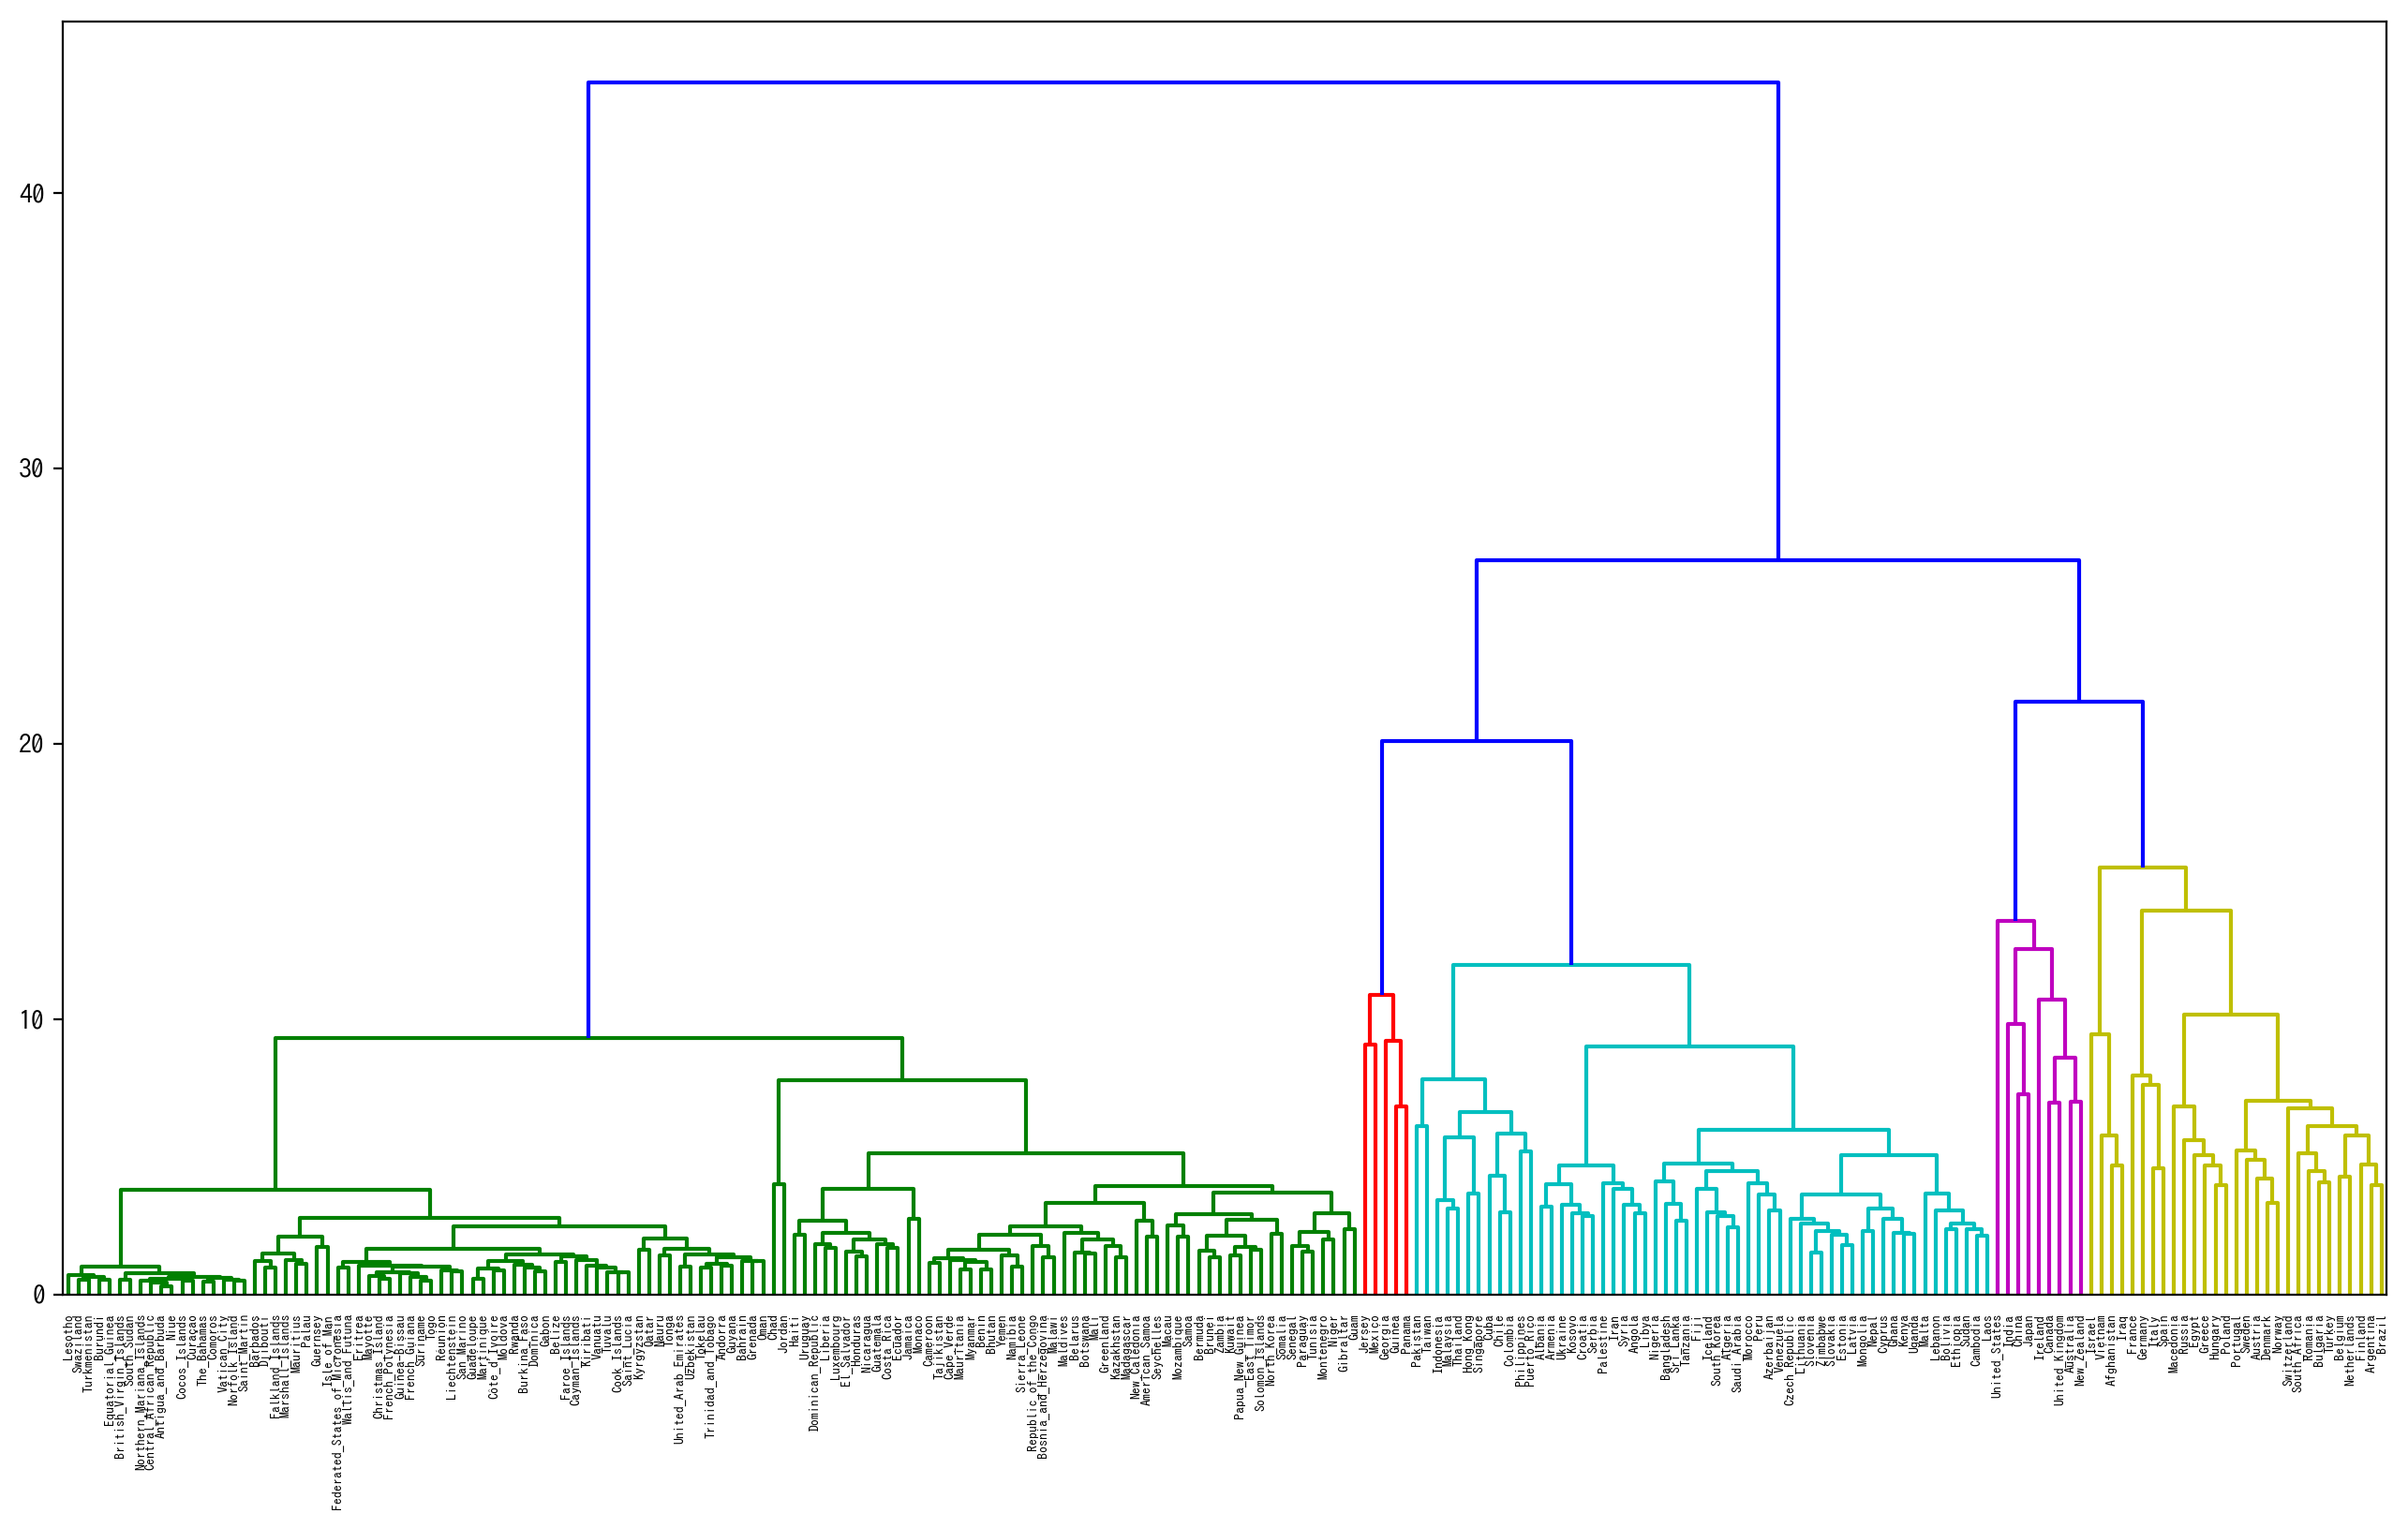

In [80]:
threshold = 0.4 * np.max(linkage_res[:, 2])
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_res, labels=df_countries.index, color_threshold=threshold)
plt.show()

In [81]:
clustered = fcluster(linkage_res, threshold, criterion='distance')

In [82]:
clustered

array([5, 3, 3, 1, 1, 3, 1, 5, 3, 4, 5, 3, 1, 1, 3, 1, 1, 5, 1, 1, 1, 1,
       3, 1, 1, 5, 1, 1, 5, 1, 1, 3, 1, 4, 1, 1, 1, 1, 3, 4, 1, 1, 3, 1,
       1, 1, 1, 1, 3, 3, 1, 3, 3, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 3, 3, 1,
       1, 3, 5, 5, 1, 1, 1, 2, 5, 3, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 3, 5, 3, 4, 3, 3, 5, 4, 1, 5, 5, 1, 4, 2, 1, 1, 3, 1, 1, 3, 3,
       1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 5, 1, 1, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 5, 1, 4, 1, 1, 3, 1, 1,
       1, 5, 1, 3, 1, 3, 2, 1, 1, 3, 3, 5, 5, 3, 1, 1, 5, 5, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 5, 1, 5, 3, 3, 1, 1, 5, 5, 3, 3,
       1, 3, 3, 1, 1, 1, 1, 1, 5, 1, 1, 3, 3, 1, 4, 4, 1, 1, 1, 1, 3, 5,
       1, 1, 1, 3], dtype=int32)

<a name='prob99'></a>
# 99. t-SNEによる可視化

96の単語ベクトルに対して，ベクトル空間をt-SNEで可視化せよ．

In [83]:
from sklearn.manifold import TSNE

In [93]:
countries_tsne = TSNE(n_components=2, random_state=0).fit_transform(vec_countries)

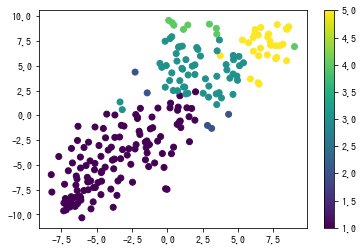

In [94]:
%matplotlib inline
plt.scatter(countries_tsne[:,0], countries_tsne[:,1], c=clustered)
# plt.colorbar()